## Reliance Industries' Stock Price Prediction

In [1]:
import pandas as pd

In [2]:
stock_price = pd.read_csv("Reliance Industries’ Stocks Dataset [2010-2018].csv")

In [3]:
stock_price.head()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity
0,1090.55,1091.1,1091.1,1021.85,1077.3,1075.50,1044.44,17520006
1,1075.50,1149.9,1149.9,1065.40,1068.7,1070.70,1078.03,4890040
2,1070.70,1079.9,1094.5,1070.65,1087.0,1088.00,1084.64,5415538
3,1088.00,1088.0,1115.0,1078.00,1101.9,1106.05,1103.49,5988404
4,1106.05,1108.0,1113.8,1096.00,1103.9,1103.15,1104.79,3453926


In [4]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Prev Close             2243 non-null   float64
 1   Open Price             2243 non-null   float64
 2   High Price             2243 non-null   float64
 3   Low Price              2243 non-null   float64
 4   Last Price             2243 non-null   float64
 5   Close Price            2243 non-null   float64
 6   Average Price          2243 non-null   float64
 7   Total Traded Quantity  2243 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 140.3 KB


In [5]:
stock_price.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity
count,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2.243000e+03
mean,962.768145,963.329202,973.893959,952.240013,962.248685,962.449576,963.125863,4.383986e+06
std,162.108484,160.811409,162.186977,159.506330,160.758330,160.724670,160.831851,2.933182e+06
min,676.100000,675.000000,682.800000,673.050000,676.150000,676.100000,676.940000,1.110540e+05
25%,852.525000,854.025000,863.400000,843.050000,852.475000,852.525000,852.320000,2.659170e+06
50%,947.400000,947.750000,957.700000,938.100000,947.000000,947.400000,948.470000,3.632863e+06
75%,1030.225000,1030.000000,1040.950000,1019.075000,1029.075000,1030.225000,1030.320000,5.119325e+06
max,2015.000000,1663.000000,1664.900000,1622.800000,1654.000000,1650.100000,1645.900000,4.312214e+07


In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

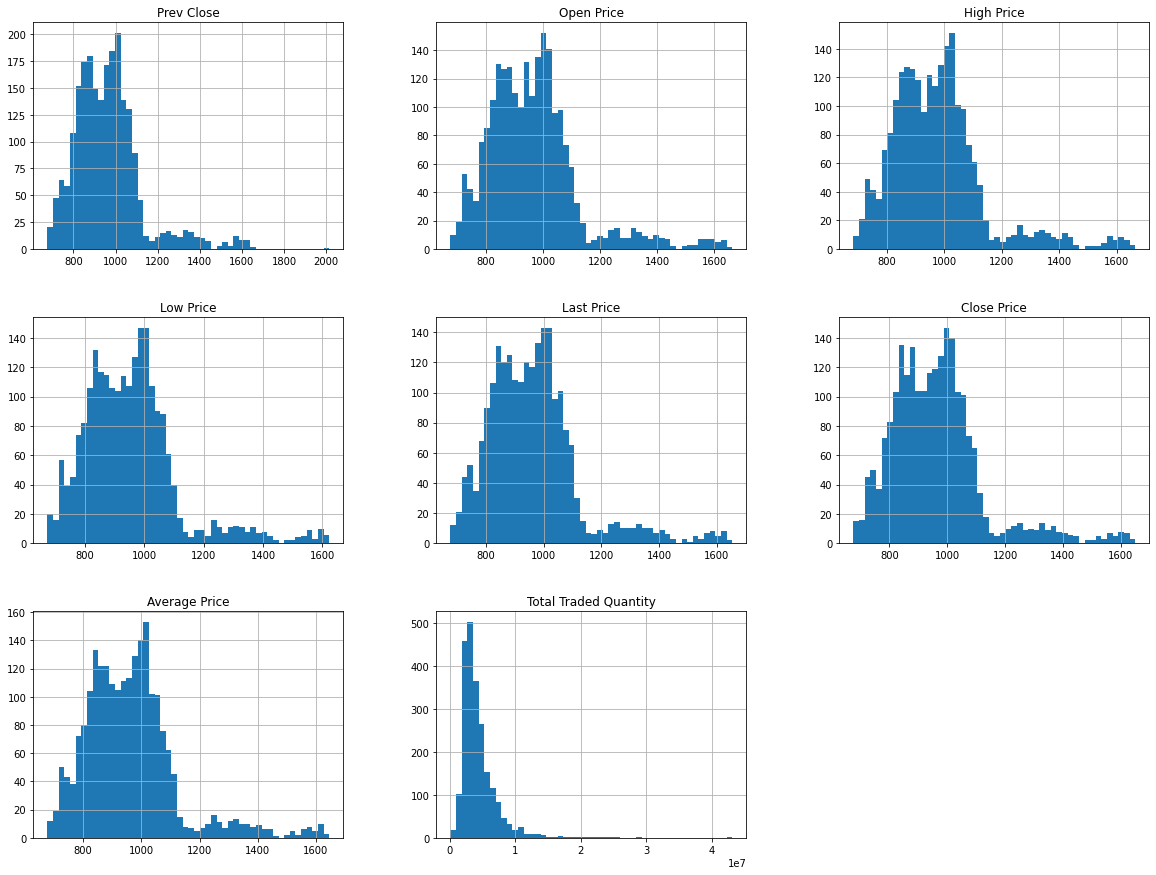

In [8]:
stock_price.hist(bins=50,figsize=(20,15))
plt.show()

## TRAIN-TEST SPLITTING

In [9]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(stock_price, 0.2)

[ 727  907 1547 ... 1130 1294  860]


In [11]:
print(f"ROWS IN TRAIN SET: {len(train_set)}\nROWS IN TEST SET: {len(test_set)}\n")

ROWS IN TRAIN SET: 1795
ROWS IN TEST SET: 448



In [12]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448 entries, 727 to 621
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Prev Close             448 non-null    float64
 1   Open Price             448 non-null    float64
 2   High Price             448 non-null    float64
 3   Low Price              448 non-null    float64
 4   Last Price             448 non-null    float64
 5   Close Price            448 non-null    float64
 6   Average Price          448 non-null    float64
 7   Total Traded Quantity  448 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 31.5 KB


In [13]:
test_set.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity
count,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,4.480000e+02
mean,962.974107,964.287165,975.313281,953.141406,963.892522,964.008482,964.152723,4.397857e+06
std,162.819910,163.663776,165.212889,163.000512,164.235794,164.322267,164.287459,2.679431e+06
min,681.650000,675.000000,682.800000,673.050000,676.150000,676.100000,676.940000,1.664870e+05
25%,846.675000,849.675000,860.912500,839.750000,852.075000,851.437500,849.750000,2.705218e+06
50%,947.225000,948.975000,955.950000,935.525000,945.175000,945.375000,946.115000,3.737479e+06
75%,1031.787500,1030.450000,1043.912500,1021.000000,1034.787500,1033.812500,1032.567500,5.333487e+06
max,1602.150000,1604.200000,1629.900000,1601.100000,1621.150000,1622.750000,1620.720000,1.927085e+07


In [14]:
stock_price = train_set.copy()

## FINDING CORRELATIONS

In [15]:
corr_matrix = stock_price.corr()

In [16]:
corr_matrix['Close Price'].sort_values(ascending=False)

Close Price              1.000000
Last Price               0.999916
Average Price            0.999312
High Price               0.998306
Low Price                0.998197
Open Price               0.995719
Prev Close               0.973814
Total Traded Quantity    0.198852
Name: Close Price, dtype: float64

In [17]:
corr_matrix['Open Price'].sort_values(ascending=False)

Open Price               1.000000
High Price               0.998218
Average Price            0.997749
Low Price                0.997571
Close Price              0.995719
Last Price               0.995535
Prev Close               0.977743
Total Traded Quantity    0.192880
Name: Open Price, dtype: float64

In [18]:
corr_matrix['Average Price'].sort_values(ascending=False)

Average Price            1.000000
Close Price              0.999312
High Price               0.999288
Last Price               0.999152
Low Price                0.999020
Open Price               0.997749
Prev Close               0.975880
Total Traded Quantity    0.195504
Name: Average Price, dtype: float64

In [19]:
corr_matrix['High Price'].sort_values(ascending=False)

High Price               1.000000
Average Price            0.999288
Close Price              0.998306
Open Price               0.998218
Last Price               0.998153
Low Price                0.997616
Prev Close               0.976050
Total Traded Quantity    0.211443
Name: High Price, dtype: float64

In [20]:
corr_matrix['Low Price'].sort_values(ascending=False)

Low Price                1.000000
Average Price            0.999020
Close Price              0.998197
Last Price               0.998047
High Price               0.997616
Open Price               0.997571
Prev Close               0.975838
Total Traded Quantity    0.178544
Name: Low Price, dtype: float64

In [21]:
corr_matrix['Last Price'].sort_values(ascending=False)

Last Price               1.000000
Close Price              0.999916
Average Price            0.999152
High Price               0.998153
Low Price                0.998047
Open Price               0.995535
Prev Close               0.973641
Total Traded Quantity    0.198634
Name: Last Price, dtype: float64

array([[<AxesSubplot:xlabel='Close Price', ylabel='Close Price'>,
        <AxesSubplot:xlabel='Last Price', ylabel='Close Price'>,
        <AxesSubplot:xlabel='Average Price', ylabel='Close Price'>,
        <AxesSubplot:xlabel='Prev Close', ylabel='Close Price'>,
        <AxesSubplot:xlabel='Open Price', ylabel='Close Price'>,
        <AxesSubplot:xlabel='High Price', ylabel='Close Price'>,
        <AxesSubplot:xlabel='Low Price', ylabel='Close Price'>],
       [<AxesSubplot:xlabel='Close Price', ylabel='Last Price'>,
        <AxesSubplot:xlabel='Last Price', ylabel='Last Price'>,
        <AxesSubplot:xlabel='Average Price', ylabel='Last Price'>,
        <AxesSubplot:xlabel='Prev Close', ylabel='Last Price'>,
        <AxesSubplot:xlabel='Open Price', ylabel='Last Price'>,
        <AxesSubplot:xlabel='High Price', ylabel='Last Price'>,
        <AxesSubplot:xlabel='Low Price', ylabel='Last Price'>],
       [<AxesSubplot:xlabel='Close Price', ylabel='Average Price'>,
        <AxesSubplot:

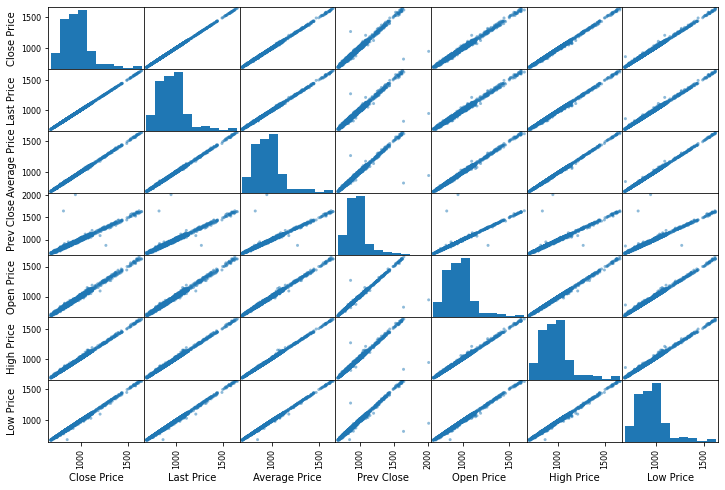

In [22]:
from pandas.plotting import scatter_matrix
attributes = ['Close Price', 'Last Price', 'Average Price', 'Prev Close', 'Open Price', 'High Price', 'Low Price']
scatter_matrix(stock_price[attributes],figsize = (12,8))

In [23]:
stock_price = train_set.drop("Close Price", axis=1)
stock_price_labels = train_set["Close Price"].copy()

## CREATING A PIPELINE

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('std_scaler', StandardScaler()),])

In [25]:
stock_price_num = my_pipeline.fit_transform(stock_price)

In [26]:
stock_price_num

array([[ 0.05300572,  0.05440542,  0.11435988, ...,  0.18239905,
         0.12534752,  0.2072158 ],
       [-0.13411125, -0.13111256, -0.1092766 , ..., -0.09593826,
        -0.08283124, -0.44276326],
       [-0.97119724, -1.05308069, -1.08125896, ..., -1.08262838,
        -1.08652795,  0.06242983],
       ...,
       [ 0.30496521,  0.30894608,  0.28781753, ...,  0.32375688,
         0.30245575,  0.1140042 ],
       [-0.60807916, -0.58772415, -0.41561521, ..., -0.38584689,
        -0.43004591,  0.11250538],
       [-0.70904822, -0.73763767, -0.79009789, ..., -0.80585476,
        -0.78838845, -0.07169131]])

## SELECTING A DESIRED MODEL FOR STOCK PRICE PREDICTION

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = LinearRegression()
model1 = DecisionTreeRegressor()
model2 = RandomForestRegressor()
model.fit(stock_price_num, stock_price_labels)
model1.fit(stock_price_num, stock_price_labels)
model2.fit(stock_price_num, stock_price_labels)

RandomForestRegressor()

In [28]:
some_data = stock_price.iloc[:5]

In [29]:
some_labels = stock_price_labels.iloc[:5]

In [30]:
prepared_data = my_pipeline.transform(some_data)

In [31]:
model.predict(prepared_data)

array([ 990.11458447,  947.48968163,  788.73221093, 1061.20333415,
        862.26689047])

In [32]:
model1.predict(prepared_data)

array([ 990.1 ,  947.7 ,  788.85, 1060.65,  861.85])

In [33]:
model2.predict(prepared_data)

array([ 990.135 ,  947.712 ,  788.8045, 1060.83  ,  862.071 ])

In [34]:
list(some_labels)

[990.1, 947.7, 788.85, 1060.65, 861.85]

## EVALUATING THE MODEL

In [35]:
from sklearn.metrics import mean_squared_error
price_predictions = model.predict(stock_price_num)
lin_mse = mean_squared_error(stock_price_labels, price_predictions)
lin_rmse = np.sqrt(lin_mse)


In [36]:
price_predictions = model1.predict(stock_price_num)
dec_mse = mean_squared_error(stock_price_labels, price_predictions)
dec_rmse = np.sqrt(dec_mse)


In [37]:
price_predictions = model2.predict(stock_price_num)
ran_mse = mean_squared_error(stock_price_labels, price_predictions)
ran_rmse = np.sqrt(ran_mse)


In [38]:
lin_rmse

1.7756875936329315

In [39]:
dec_rmse

4.647705350106186e-15

In [40]:
ran_rmse

1.078841463682444

## CROSS VALIDATION

In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, stock_price, stock_price_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [42]:
scores1 = cross_val_score(model1, stock_price, stock_price_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores1 = np.sqrt(-scores1)

In [43]:
scores2 = cross_val_score(model2, stock_price, stock_price_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores2 = np.sqrt(-scores2)

In [44]:
rmse_scores

array([1.73373263, 1.71883173, 2.08080183, 1.83930709, 1.92017238,
       1.86302943, 1.7645314 , 1.63781012, 1.70563969, 1.65663261])

In [45]:
rmse_scores1

array([2.63152364, 3.71602012, 3.81627545, 2.74680875, 5.52233973,
       3.64245029, 2.87630951, 3.52272154, 4.46604977, 2.47729635])

In [46]:
rmse_scores2

array([2.23320132, 2.9991636 , 3.58429321, 2.36147525, 3.40428183,
       2.57829062, 2.64486489, 2.75666934, 2.73405726, 2.49569399])

In [47]:
def print_scores(scores):
    print("Scores:", scores)
    print("\n")
    print("Mean:", scores.mean())
    print("\n")
    print("Standard Deviation:", scores.std())

In [48]:
print_scores(rmse_scores)

Scores: [1.73373263 1.71883173 2.08080183 1.83930709 1.92017238 1.86302943
 1.7645314  1.63781012 1.70563969 1.65663261]


Mean: 1.792048890194702


Standard Deviation: 0.1289100200986764


In [49]:
print_scores(rmse_scores1)

Scores: [2.63152364 3.71602012 3.81627545 2.74680875 5.52233973 3.64245029
 2.87630951 3.52272154 4.46604977 2.47729635]


Mean: 3.541779516933789


Standard Deviation: 0.8904840760738643


In [50]:
print_scores(rmse_scores2)

Scores: [2.23320132 2.9991636  3.58429321 2.36147525 3.40428183 2.57829062
 2.64486489 2.75666934 2.73405726 2.49569399]


Mean: 2.779199129600495


Standard Deviation: 0.4124592750398397


## SAVING THE MODEL

In [51]:
from joblib import dump, load
dump(model, "Linear_Regression.joblib")

['Linear_Regression.joblib']

In [52]:
from joblib import dump, load
dump(model1, "Decision_Tree_Regression.joblib")

['Decision_Tree_Regression.joblib']

In [53]:
from joblib import dump, load
dump(model2, "Random_Forest_Regression.joblib")

['Random_Forest_Regression.joblib']

## IMPLEMENTING MODELS ON TEST_SET

## LINEAR REGRESSION

In [54]:
x_test_set = test_set.drop("Close Price", axis=1)
y_test_set = test_set["Close Price"].copy()
x_test_prepared = my_pipeline.transform(x_test_set)
final_predictions = model.predict(x_test_prepared)
mse_model = mean_squared_error(y_test_set, final_predictions)
rmse_model = np.sqrt(mse_model)
rmse_model

1.7906056032906494

## DECISION TREE REGRESSION

In [55]:
x_test_set = test_set.drop("Close Price", axis=1)
y_test_set = test_set["Close Price"].copy()
x_test_prepared = my_pipeline.transform(x_test_set)
final_predictions = model1.predict(x_test_prepared)
mse_model1 = mean_squared_error(y_test_set, final_predictions)
rmse_model1 = np.sqrt(mse_model1)
rmse_model1

3.307298814203003

## RANDOM FOREST REGRESSION 

In [56]:
x_test_set = test_set.drop("Close Price", axis=1)
y_test_set = test_set["Close Price"].copy()
x_test_prepared = my_pipeline.transform(x_test_set)
final_predictions = model2.predict(x_test_prepared)
mse_model2 = mean_squared_error(y_test_set, final_predictions)
rmse_model2 = np.sqrt(mse_model2)
rmse_model2

2.7282285579060015

## THE BEST RESULTS ARE FROM LINEAR REGRESSION WHICH GIVES THE RMSE VALUE OF "1.79"